In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_geojson as geo_pd
import missingno as msno
import numpy as np
%matplotlib inline

In [2]:
# LOADING DATA
listings = pd.read_csv('https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2022-2023/airbnb/listings.csv.gz')

In [3]:
calendar = pd.read_csv('https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2022-2023/airbnb/calendar.csv.gz')

In [4]:
neighbourhoods = geo_pd.read_geojson_url('https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2022-2023/airbnb/neighbourhoods.geojson')

In [5]:
reviews = pd.read_csv('https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2022-2023/airbnb/reviews.csv.gz')

<AxesSubplot:>

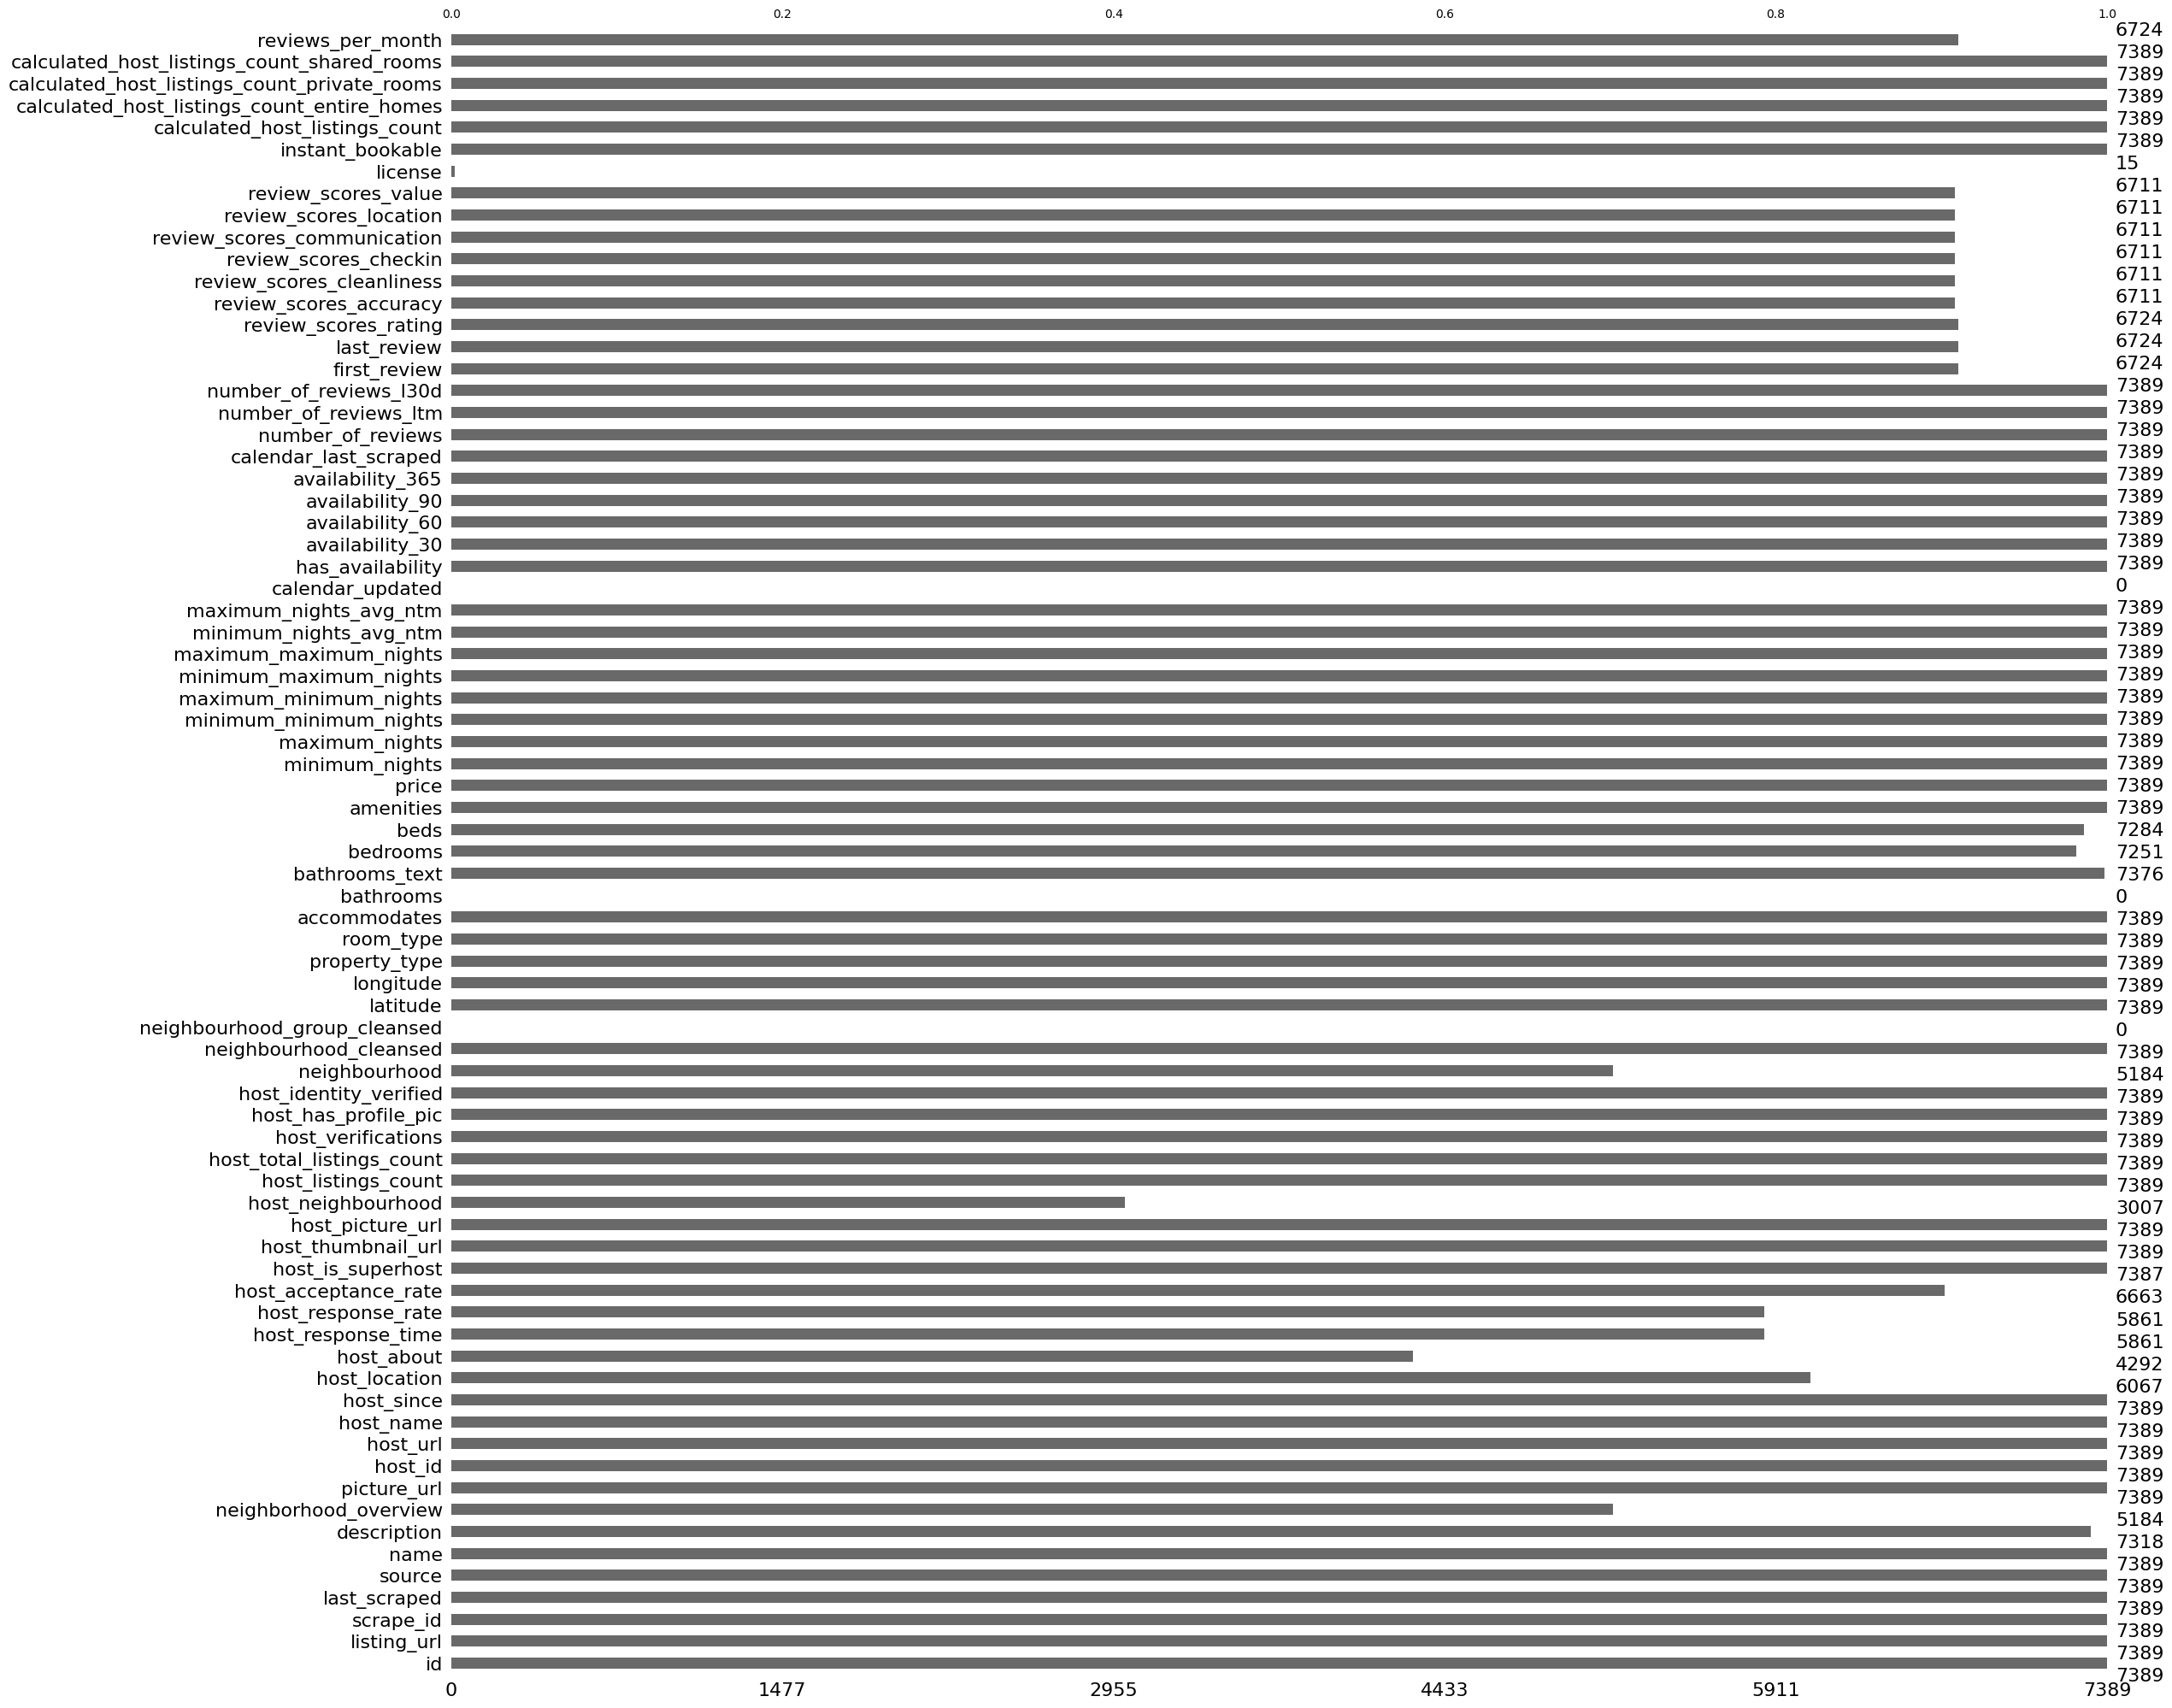

In [6]:
msno.bar(listings)

## Cleansing Ideas:
- License
- calendar update??
- Bathroom text after extractin numerical data and adding to bathrooms
- neighbourhood group cleansed (maybe fill data using geojson?)
- neighbourhood
- host neighbourhood
- host acceptance rate (fill)
- host response rate (fill)
- host response time (fill)
- host about
- host location ??
- neighbouthood overview
- drop non numerical columns which have more than X unique values ??


['100%' '99%' '98%' '97%' '96%' '94%' '0%' '93%' '91%' '95%' '88%' '92%'
 '86%' '90%' '75%' '89%' '67%' '83%' '80%' '50%' '85%' '82%' '87%' '33%'
 '1%' '79%' '73%' '71%' '74%' '78%' '84%' '81%' '77%' '35%' '56%' '70%'
 '60%' '76%' '49%' '64%' '68%' '72%' '44%' '25%' '38%' '69%' '43%' '59%'
 '19%' '62%' '40%' '63%' '61%' '57%' '66%' '58%' '65%' '46%' '51%' '42%'
 '52%' '47%' '45%' '36%' '53%' '54%' '55%' '39%' '48%' '14%' '17%' '30%'
 '21%' '29%' '7%' '20%' '10%' '6%' '23%' '37%' '22%' '13%']
[2863  789  347  299  193  135  117  114  112  110  108  108   79   75
   74   73   72   64   57   56   54   46   44   43   37   34   30   29
   29   28   28   25   24   21   18   18   17   17   16   16   15   14
   13   13   11   11   11   10   10   10   10   10    9    8    8    7
    7    7    5    4    4    4    3    3    3    3    3    3    3    3
    2    2    2    2    2    2    2    1    1    1    1    1]


<BarContainer object of 82 artists>

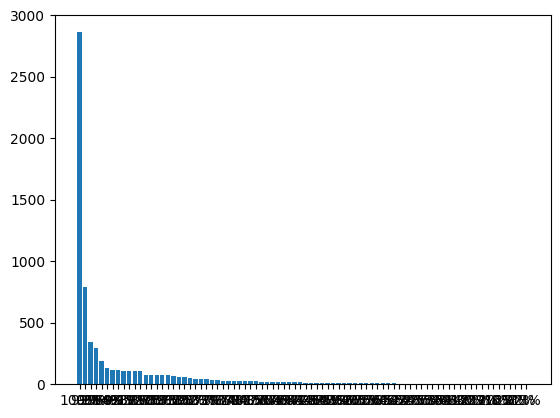

In [7]:
# TEST TO SEE DISTRIBUTION - WE CAN FILL WITH AVERGAE CLOSE TO 100%

rr = listings['host_acceptance_rate'].value_counts()
val = rr.index.values
cou = rr.values
print(val)
print(cou)
plt.bar(val, cou)

In [8]:
list1 = listings.copy()

In [9]:
listings['bathrooms'] = listings['bathrooms_text'].str.extract(r'([\d.])').astype(float)

In [10]:
listings['bathrooms'].isna().value_counts()

False    7360
True       29
Name: bathrooms, dtype: int64

In [11]:
# drop column in pd
listings.drop(['license', 'neighbourhood', 'host_neighbourhood', 
               'host_location', 'neighborhood_overview','neighbourhood_group_cleansed', 
               'calendar_updated', 'host_about'], axis = 1, inplace=True)


<AxesSubplot:>

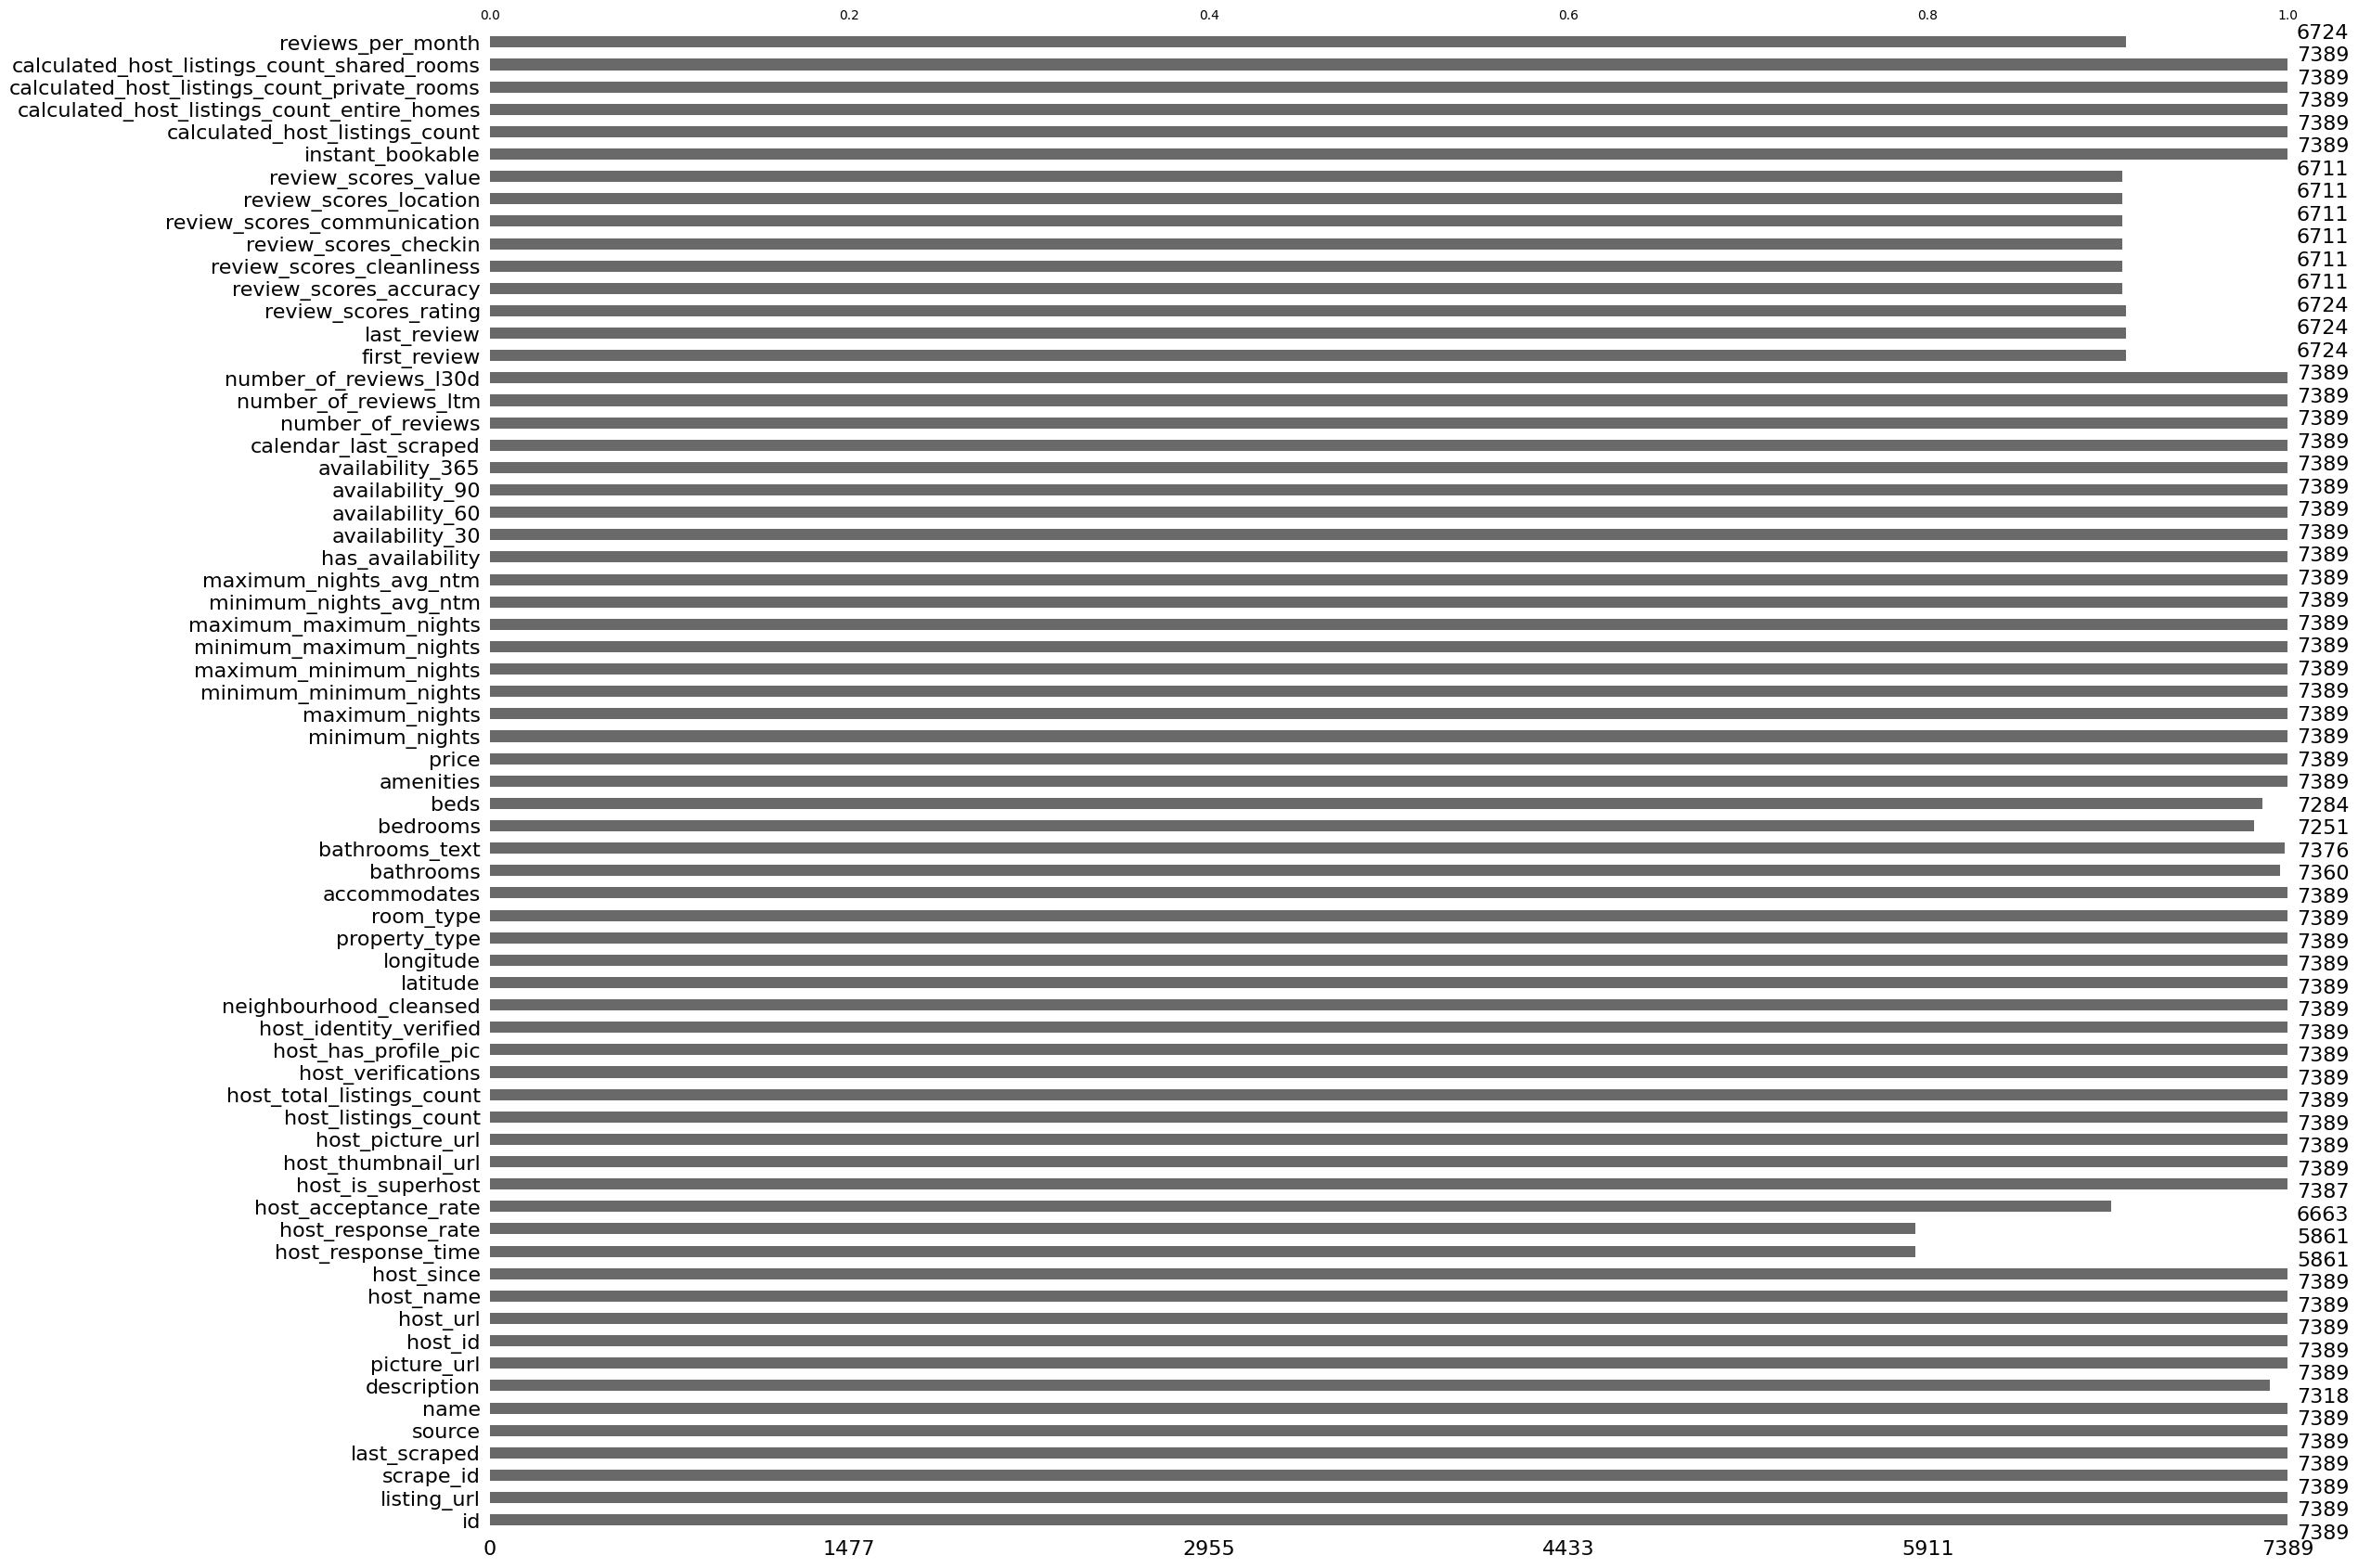

In [12]:
msno.bar(listings)

In [13]:
int(listings['host_acceptance_rate'].str.extract(r'(\d+)').astype(float).mean())

90

In [14]:
listings['host_acceptance_rate'].fillna(str(int(listings['host_acceptance_rate'].str.extract(r'(\d+)').astype(float).mean()))+'%', inplace=True)
listings['host_response_rate'].fillna((listings['host_response_rate'].value_counts().index[0]), inplace=True)
listings['host_response_time'].fillna((listings['host_response_time'].value_counts().index[0]), inplace=True)


In [15]:
listings.dropna(inplace=True)

<AxesSubplot:>

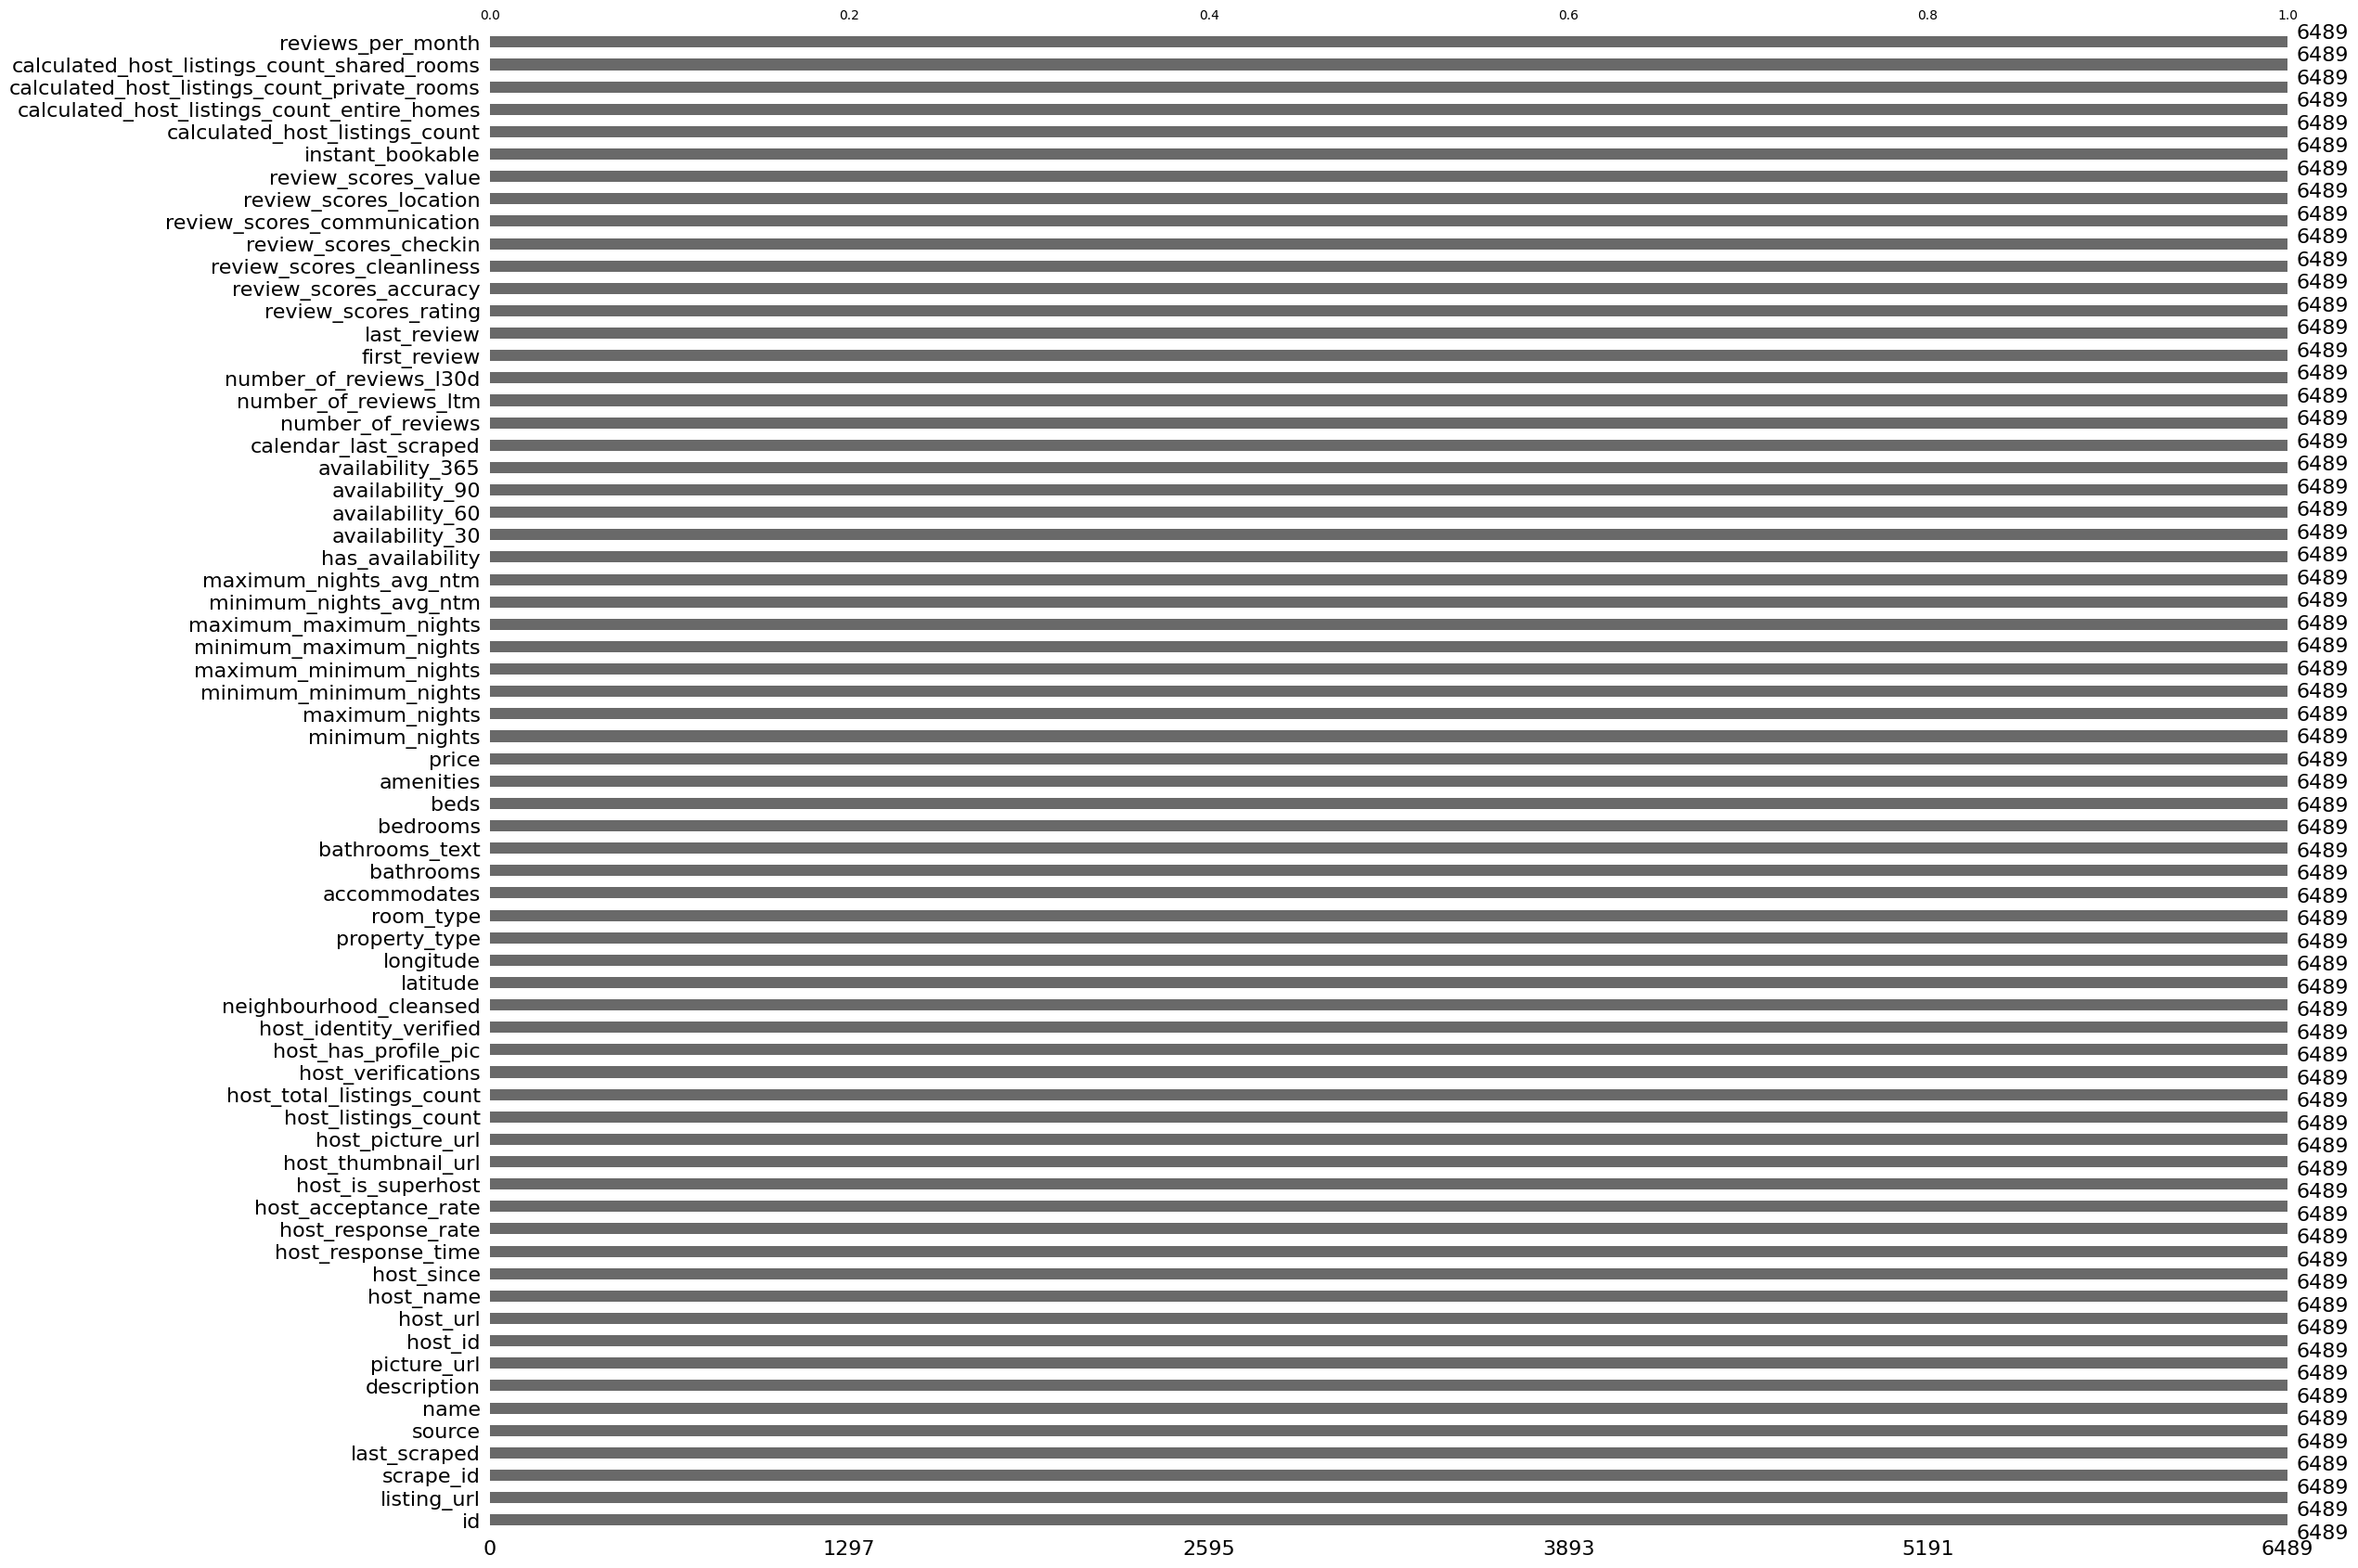

In [16]:
msno.bar(listings)

## TARGETS

1. Plotting polygon maps, later integrating with pricing maybe?
2. Figuring out filling na values with proper distriution
3. How well can features of a property listing be used to predict its popularity or
short-term rental price?

In [17]:
listings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,6489.0,1.722038e+17,2.901548e+17,1.542000e+04,1.880320e+07,3.550758e+07,5.678788e+17,7.768103e+17
scrape_id,6489.0,2.022122e+13,0.000000e+00,2.022122e+13,2.022122e+13,2.022122e+13,2.022122e+13,2.022122e+13
host_id,6489.0,1.310877e+08,1.413257e+08,4.649800e+04,2.190647e+07,7.011170e+07,1.992795e+08,4.888903e+08
host_listings_count,6489.0,1.769240e+01,1.046833e+02,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,1.650000e+03
host_total_listings_count,6489.0,3.471798e+01,2.320264e+02,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.136000e+03
latitude,6489.0,5.595127e+01,1.555846e-02,5.585816e+01,5.594279e+01,5.595193e+01,5.596061e+01,5.599117e+01
longitude,6489.0,-3.197417e+00,3.855585e-02,-3.426640e+00,-3.211370e+00,-3.192570e+00,-3.177110e+00,-3.078950e+00
accommodates,6489.0,3.572970e+00,2.037249e+00,1.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00,1.600000e+01
bathrooms,6489.0,1.226537e+00,5.421492e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
bedrooms,6489.0,1.632763e+00,8.825855e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.100000e+01


In [18]:
a = listings['amenities'].apply(eval).tolist()

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [20]:
onehot = mlb.fit_transform(a)

In [21]:
for i in mlb.classes_:
    if "soap" in i:
        print(i)

 Dove body soap
 Neils Yard Remedies body soap
100 Natural, cruelty free & eco friendly  body soap
Aesop  body soap
Aesop body soap
Aesop shower gel body soap
Aldi body soap
All body soap
Any body soap
Arbonne body soap
Argile body soap
Arran Aromatics body soap
Assorted body soap
Austin & Austin body soap
BAYLISS AND HARDING body soap
Basics body soap
Bath house - Uk made sustainable products  body soap
Bioderma body soap
Body soap
Body wash Gel...soap body soap
Boots body soap
Branded or Waitrose body soap
Carex body soap
Cien body soap
Cole & Lewis body soap
Cole Lewis body soap
Complimentary shampoo and conditioner with shower gel in the bathroom body soap
Dave or Nivea  body soap
Delicate body soap
Different types! body soap
Dook body soap
Dove  body soap
Dove Bodywash & Bodyshop Facewash body soap
Dove and Sanex body soap
Dove body soap
Dove gentle  body soap
Dove hand soap and shower gel for guest use.  body soap
Dove, Palmolive or similar body soap
Dr Organic  body soap
Dr. Bro

In [22]:

new_col_names = mlb.classes_

# Create new DataFrame with transformed/one-hot encoded IDs
ids = pd.DataFrame(onehot, columns=new_col_names,index=listings['amenities'].index)

# Concat with original `Label` column
amen = pd.concat( [listings[['amenities']], ids], axis=1 )
display(amen)

,amenities,Dove body soap,LG sound system,Neils Yard Remedies body soap,Various conditioner,'Simple' - sensitive skin experts shampoo,. conditioner,. shampoo,"100 Natural, cruelty free & eco friendly body soap","100"" HDTV with Apple TV, Disney+, Amazon Prime Video, Netflix",...,Yamaha Soundbar sound system,"Yamaha, Jongo sound system with Bluetooth and aux",You will have a bottle of versatile shower gel for yourself to use but you aslo can use any our shower products body soap,ZANUSSI stainless steel oven,Zanussi induction stove,Zanussi oven,Zanussi refrigerator,Zanussi stainless steel gas stove,Zanussi stainless steel oven,Zanussi stove
0,"[""Self check-in"", ""Hot water kettle"", ""Private...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[""Self check-in"", ""Stove"", ""Bed linens"", ""Chil...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[""Free parking on premises \u2013 1 space"", ""S...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[""Bathroom essentials"", ""Self check-in"", ""Carb...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"[""Hot water kettle"", ""Bed linens"", ""Drying rac...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7384,"[""Heating"", ""TV"", ""Free parking on premises"", ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7385,"[""TV with standard cable"", ""Stove"", ""Private e...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7386,"[""Self check-in"", ""Carbon monoxide alarm"", ""Lo...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7387,"[""TV with standard cable"", ""Stove"", ""Self chec...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
amen_copy = amen.copy()
clean_amen = pd.DataFrame(np.zeros(len(amen.index)), index = amen.index)
for i in [['TV'], ['soap', 'shampoo', 'conditioner'], ['stove'], ['refrigerator'], ['oven'], ['sound'],['backyard'],['bbq', 'barbecue'],['wifi'], ['ac', 'air conditioner','air conditioning'], ['games', 'gaming'], ['view'], ['parking']]:
    for j in amen_copy:
        if any([k.lower() in str(j).lower() for k in i]):
            try:
                if i[0] in clean_amen:
                    clean_amen[i[0]] += amen[j]       
                    amen.drop([j], axis = 1, inplace = True)      
                else:
                    clean_amen[i[0]] = amen[j]
                    amen.drop([j], axis = 1, inplace = True) 
            except KeyError:
                pass  
clean_amen.value_counts()

0    TV  soap  stove  refrigerator  oven  sound  backyard  bbq  wifi  ac  games  view  parking
0.0  1   1     1      1             1     0      0         0    1     0   0      0     0          228
                                                                                       1          188
                                                                      1   0      0     1          153
               0      0             0     0      0         0    1     0   0      0     0           99
                                                                                       1           83
                                                                                                 ... 
                      1             1     0      1         0    1     3   0      0     0            1
                                                                      2   1      1     1            1
                                                                                 0     1 

In [24]:
c= 0
for i in amen:
    c+=1

c

263

In [38]:
for i in amen:
    if 'mi' in i:
        print(i)

Exercise equipment: elliptical, free weights, stationary bike, treadmill, yoga mat
Exercise equipment: elliptical, stationary bike, treadmill
Exercise equipment: free weights, stationary bike, treadmill
Exercise equipment: stationary bike, treadmill
Exercise equipment: stationary bike, treadmill, yoga mat
Exercise equipment: treadmill
Free carport on premises
Free residential garage on premises


In [41]:
display(clean_amen.isna().value_counts())

0      TV     soap   stove  refrigerator  oven   sound  backyard  bbq    wifi   ac     games  view   parking
False  False  False  False  False         False  False  False     False  False  False  False  False  False      6489
dtype: int64

In [40]:

clean_amen = clean_amen.applymap(bool)

In [42]:
mergedlistings = pd.merge(listings, clean_amen, left_index=True, right_index=True)

In [64]:
df.describe(include = object).T

,count,unique,top,freq
host_since,6489,2378,2015-07-05,142
host_response_time,6489,4,within an hour,5433
host_response_rate,6489,41,100%,5482
host_acceptance_rate,6489,80,100%,2530
host_is_superhost,6489,2,f,3888
host_verifications,6489,6,"['email', 'phone']",5083
neighbourhood_cleansed,6489,111,"Old Town, Princes Street and Leith Street",721
property_type,6489,46,Entire rental unit,2813
room_type,6489,4,Entire home/apt,4625
price,6489,489,$100.00,148


In [44]:
cleanlistings = mergedlistings.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
                      'description', 'picture_url', 'host_id', 'host_url', 'host_name',
                      'host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic', 
                      'host_identity_verified', 'bathrooms_text', 'amenities', 'calendar_last_scraped', 
                      'minimum_nights', 'maximum_nights','minimum_minimum_nights', 'maximum_minimum_nights',
                      'minimum_maximum_nights', 'maximum_maximum_nights', 'number_of_reviews_ltm', 
                      'number_of_reviews_l30d', 'first_review','last_review'], 
                      axis = 1)              
                                   


In [49]:
def get_listing_mean(listing_id):
    
    '''
    Requires numerical integer listing ID
    Returns float mean value.
    '''
    
    return calendar[calendar['listing_id'] == listing_id]['adjusted_price'].mean()

def get_listing_min(listing_id):
    
    '''
    Requires numerical integer listing ID
    Returns float min value.
    '''
    
    return calendar[calendar['listing_id'] == listing_id]['adjusted_price'].min()

def get_listing_max(listing_id):
    
    '''
    Requires numerical integer listing ID
    Returns float max value.
    '''
    
    return calendar[calendar['listing_id'] == listing_id]['adjusted_price'].max()
def remove_dollar(value):
    
    '''
    Requires string value
    Returns float without $ sign and comma sign.
    '''
    value = str(value)
    value = value.replace('$', '')
    value = value.replace(',', '')
    return float(value)

In [50]:
calendar['adjusted_price'] = calendar['adjusted_price'].apply(remove_dollar)
calendar['price'] = calendar['price'].apply(remove_dollar)
price_df = calendar['listing_id'].value_counts().reset_index()
price_df.columns = ['listing_id', 'days_available']
price_df['mean_price'] = price_df['listing_id'].apply(get_listing_mean)
price_df['min_price'] = price_df['listing_id'].apply(get_listing_min)
price_df['max_price'] = price_df['listing_id'].apply(get_listing_max)

price_df.drop('days_available', axis=1, inplace=True)


In [152]:
df = pd.merge(cleanlistings, price_df, left_on='id', right_on='listing_id')


In [153]:
df.describe(include = object).T

,count,unique,top,freq
host_since,6489,2378,2015-07-05,142
host_response_time,6489,4,within an hour,5433
host_response_rate,6489,41,100%,5482
host_acceptance_rate,6489,80,100%,2530
host_is_superhost,6489,2,f,3888
host_verifications,6489,6,"['email', 'phone']",5083
neighbourhood_cleansed,6489,111,"Old Town, Princes Street and Leith Street",721
property_type,6489,46,Entire rental unit,2813
room_type,6489,4,Entire home/apt,4625
price,6489,489,$100.00,148


In [154]:
df.host_is_superhost = df.host_is_superhost.replace({'t': 1, 'f': 0})
df.has_availability = df.has_availability.replace({'t': 1, 'f': 0})
df.instant_bookable = df.instant_bookable.replace({'t': 1, 'f': 0})
df.host_response_time = df.host_response_time.replace({'within an hour': 1, 'within a few hours': 2, 'within a day':3, 'a few days or more':4 })
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
df['host_since'] =  pd.to_datetime(df['host_since'], infer_datetime_format=True)


In [155]:
df['room_type'].value_counts()

Entire home/apt    4625
Private room       1826
Hotel room           24
Shared room          14
Name: room_type, dtype: int64

In [156]:
df = df.drop([0, 'listing_id', 'price', 'host_verifications', 'neighbourhood_cleansed'], 
                      axis = 1)              
                                   

/tmp/ipykernel_20200/2520058412.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot:>

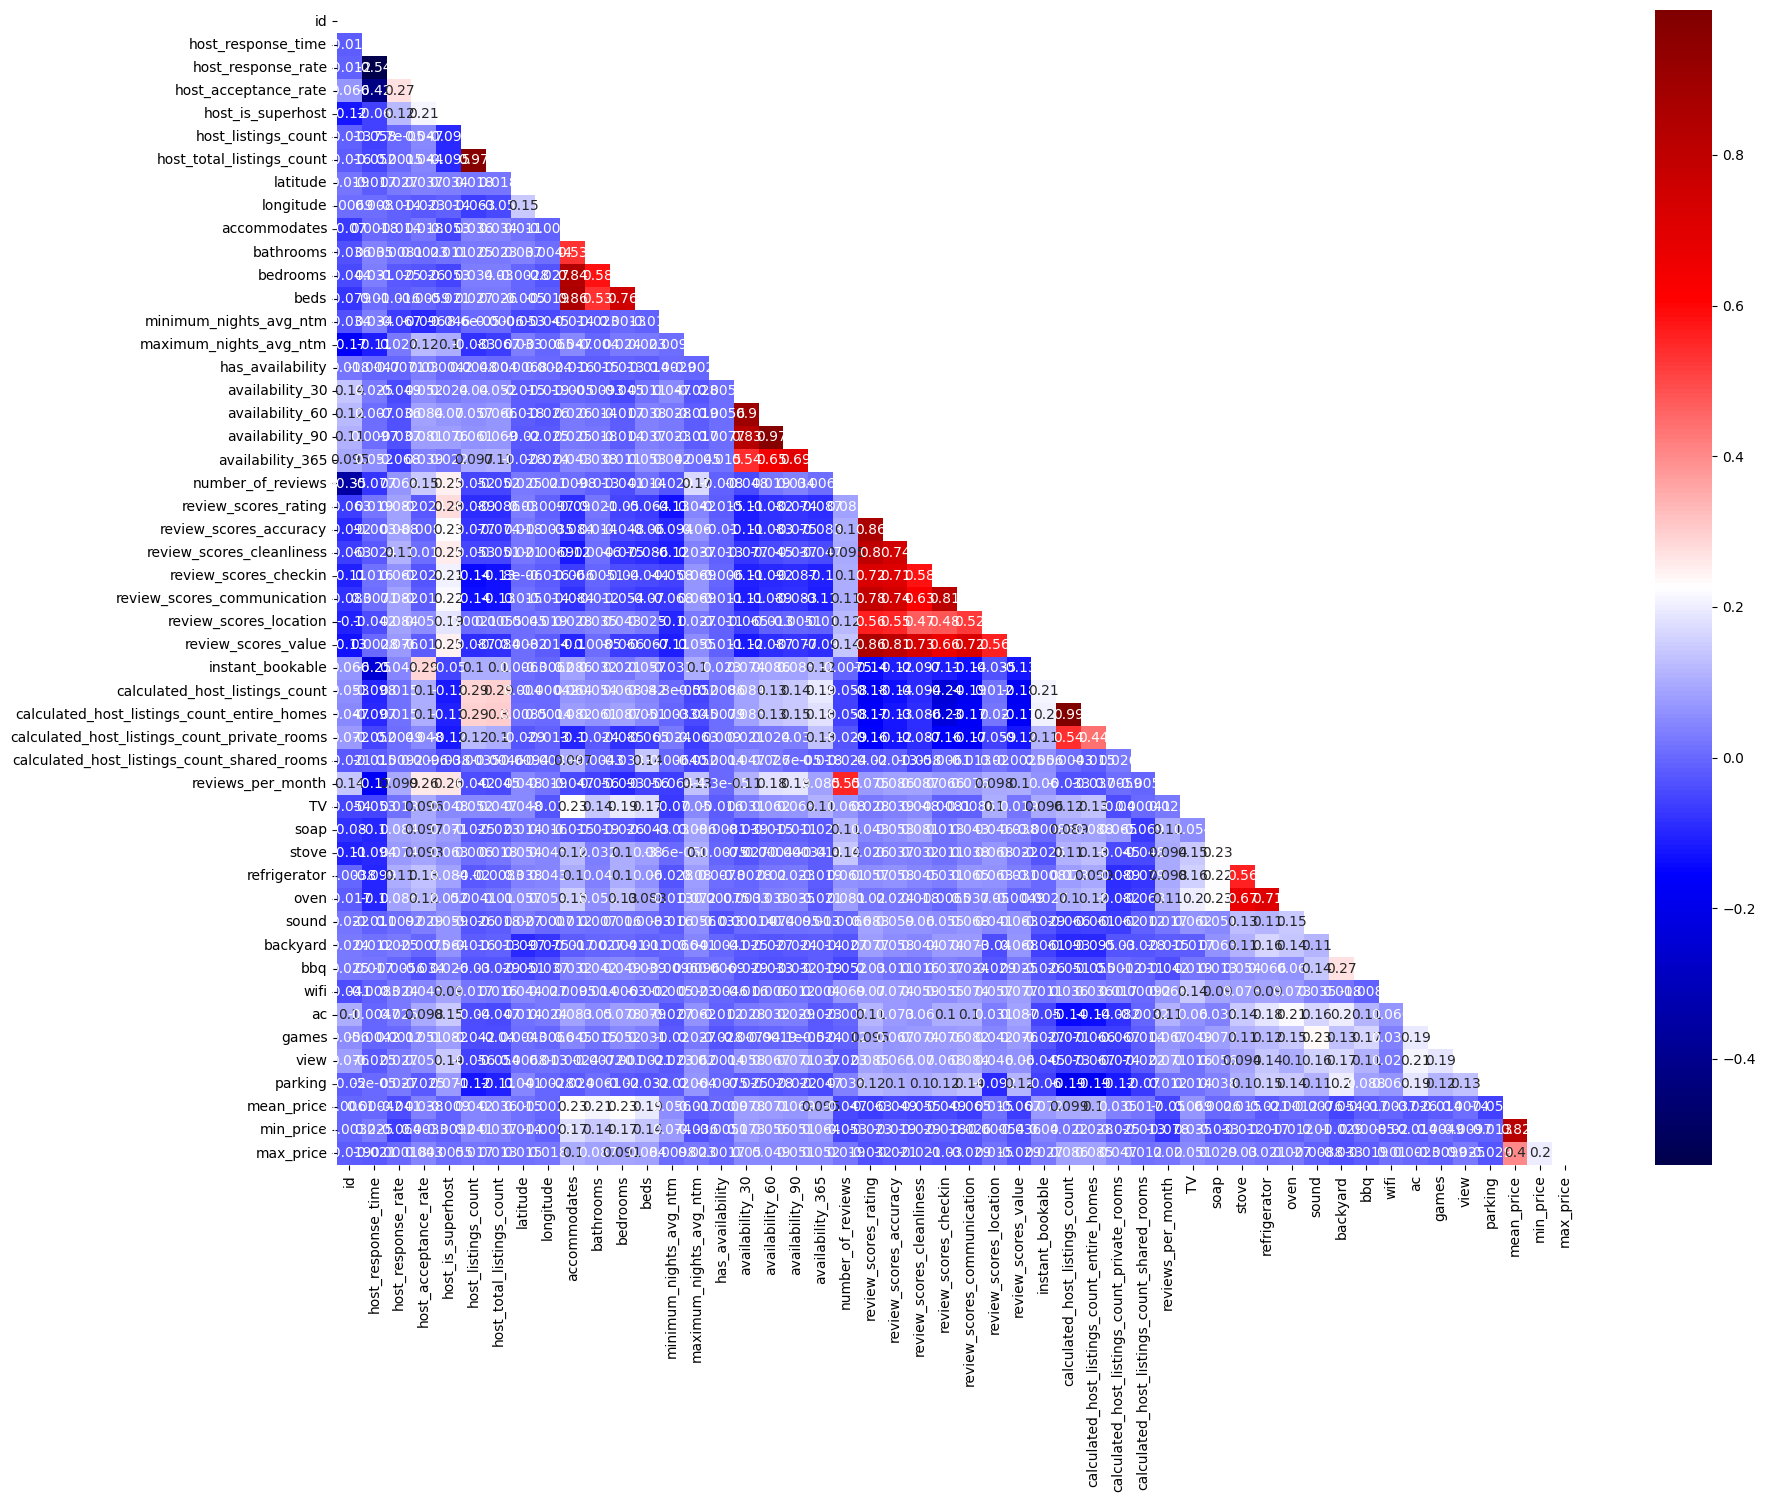

In [157]:
#Finding Correlation between variables
corr = df.corr()

mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='seismic',annot=True,mask=mask)

In [171]:
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lars_path
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score
import scipy.stats as stats
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
df['log_price'] = np.log(df['mean_price'])

In [160]:
# Quartiles by the Empirical Rule

extprice = df['mean_price'].quantile([0.0015, 0.9985])
display(extprice)
low = extprice[0.0015]
high = extprice[0.9985]


# Remove outliers in the dataframe to include only two standard deviations
df = df[df['mean_price']>=low]
df = df[df['mean_price']<=high]

0.0015      18.955945
0.9985    3356.046685
Name: mean_price, dtype: float64

/tmp/ipykernel_20200/2667358383.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_price'], kde=True,)


Skewness: 0.394288
Kurtosis: 0.361325


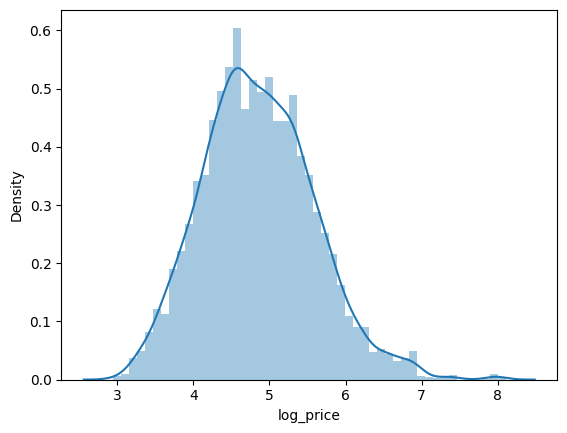

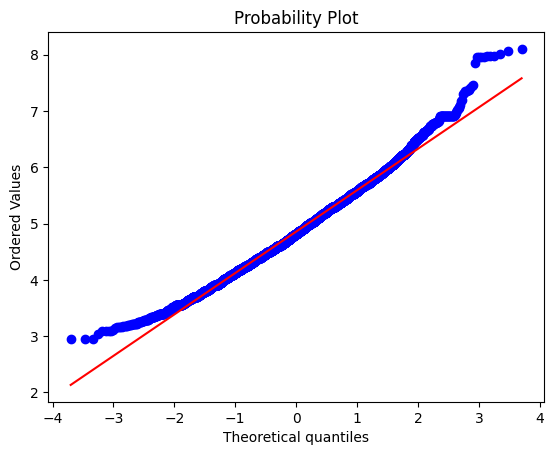

In [161]:
sns.distplot(df['log_price'], kde=True,)
fig = plt.figure()
res = stats.probplot(df['log_price'], plot=plt)
print("Skewness: %f" % df['log_price'].skew())
print("Kurtosis: %f" % df['log_price'].kurt())

In [170]:
df.describe().columns

Index(['id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'mean_price', 'min_price', 'max_price', 'log_price'],
      dtype='object')

In [175]:
y_census, X_census = patsy.dmatrices('log_price~ TV + soap + stove + refrigerator + oven + sound + backyard + bbq + wifi + ac + games + view + parking + host_response_time + host_response_rate + host_acceptance_rate + host_is_superhost + host_listings_count + host_total_listings_count + latitude + longitude + accommodates + bathrooms + bedrooms + beds +minimum_nights_avg_ntm + maximum_nights_avg_ntm + has_availability + availability_30 + availability_60 +availability_90 + availability_365 + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable + calculated_host_listings_count + calculated_host_listings_count_entire_homes + calculated_host_listings_count_private_rooms + calculated_host_listings_count_shared_rooms + reviews_per_month + mean_price + min_price + max_price +log_price', data=df, return_type="dataframe")

#test_size 80-20 split
X_train_census, X_test_census, y_train_census, y_test_census = train_test_split(X_census, y_census, test_size=0.2,
random_state=42)
X_train_census.shape[0] + X_test_census.shape[0] == df.shape[0]

# Create model
model_census_sm = sm.OLS(y_train_census,X_train_census)

# Fit model to training set
fit_census = model_census_sm.fit()

# Print fit summary
fit_census.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.436e+26
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:48:47   Log-Likelihood:             1.3945e+05
No. Observations:                5175   AIC:                        -2.788e+05
Df Residuals:                    5124   BIC:                        -2.785e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                    -2.056e-13   2.49e-11     -0.008      0.993   -4.89e-11    4.85e-11
TV[T.True]                                   -2.319e-15   1.83e-14     -0.126      0.899   -3.83e-14    3.36e-14
soap[T.True]                                   9.55e-16   1.58e-14      0.060      0.952   -3.01e-14     3.2e-14
stove[T.True]                                -8.033e-15   1.86e-14     -0.433      0.665   -4.44e-14    2.83e-14
refrigerator[T.True]                          7.097e-15   2.38e-14      0.298      0.766   -3.95e-14    5.37e-14
oven[T.True]                                  2.426e-15   2.36e-14      0.103      0.918   -4.39e-14    4.87e-14
sound[T.True]                                -1.837e-15   2.88e-14     -0.064      0.949   -5.83e-14    5.47e-14
backyard[T.True]                             -1.136e-15   1.65e-14     -0.069      0.945   -3.35e-14    3.12e-14
bbq[T.True]                                   1.313e-15   3.33e-14      0.039      0.969   -6.39e-14    6.66e-14
wifi[T.True]                                  -2.87e-15   4.65e-14     -0.062      0.951    -9.4e-14    8.83e-14
ac[T.True]                                    2.958e-16   1.56e-14      0.019      0.985   -3.02e-14    3.08e-14
games[T.True]                                -1.969e-16   2.57e-14     -0.008      0.994   -5.05e-14    5.01e-14
view[T.True]                                  1.444e-15   1.84e-14      0.078      0.938   -3.47e-14    3.76e-14
parking[T.True]                               1.917e-16   1.66e-14      0.012      0.991   -3.24e-14    3.28e-14
host_response_time                           -4.287e-16   1.46e-14     -0.029      0.977    -2.9e-14    2.82e-14
host_response_rate                           -2.439e-15   8.33e-14     -0.029      0.977   -1.66e-13    1.61e-13
host_acceptance_rate                         -5.573e-16   4.87e-14     -0.011      0.991   -9.61e-14    9.49e-14
host_is_superhost                            -2.189e-15   1.54e-14     -0.142      0.887   -3.25e-14    2.81e-14
host_listings_count                          -1.642e-16   3.37e-16     -0.487      0.627   -8.26e-16    4.97e-16
host_total_listings_count                     4.003e-17   1.62e-16      0.247      0.805   -2.77e-16    3.57e-16
latitude                                      4.288e-15   4.43e-13      0.010      0.992   -8.65e-13    8.73e-13
longitude                                     7.315e-15   1.77e-13      0.041      0.967   -3.39e-13    3.54e-13
accommodates                                 -9.584e-17   8.34e-15     -0.011      0.991   -1.64e-14    1.62e-14
bathrooms                                       5.1e-16   1.59e-14      0.032      0.974   -3.07e-14    3.17e-14
bedrooms                        

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop("log_price", axis=1)
y = df["log_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

# Make prediction on new data
new_listing = pd.DataFrame({
    "city": "New York",
    "bedrooms": 2,
    "bathrooms": 1,
    "wifi": 1,
    "pool": 0,
    "gym": 1
}, index=[0])


TypeError: Cannot cast DatetimeArray to dtype float32

In [180]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

# Create instance of the model, `LinearRegression` function from 
# Scikit-Learn and fit the model on the training data:

hpm_reg = LinearRegression()  
hpm_reg.fit(X_train, y_train) #training the algorithm

# Now that the model has been fit we can make predictions by calling 
# the predict command. We are making predictions on the testing set:

training_preds_hpm_reg = hpm_reg.predict(X_train)
val_preds_hpm_reg = hpm_reg.predict(X_test)


# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_hpm_reg),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_hpm_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_hpm_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_hpm_reg),4))

ModuleNotFoundError: No module named 'xgboost'